In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer

In [36]:
data = pd.read_csv('HousingData1')

In [37]:
data

Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1   

     TAX  PTRATIO  LSTAT  MEDV  
0    296     15.3   4.98  24.0  
1    242     17.8   9.14  21.6  
2    242     17.8   4.03  34.7  
3    222     18.7   2.94  33.4  
4    222     18.7    NaN  36.2  
..   ...      ...    ...   ...  
501  273     21.0    NaN  22.4  
502  273     21.0   9.08  20.6  
503  273     21.0   5.64  23.9  
504  273     21.0   6.48  22.0  
505  273     21.0   7.88  11.9  

[506 rows x 14 columns]

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        486 non-null    float64
 2   ZN          486 non-null    float64
 3   INDUS       486 non-null    float64
 4   CHAS        486 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         486 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    int64  
 11  PTRATIO     506 non-null    float64
 12  LSTAT       486 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [39]:
data.describe()

Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  486.000000  486.000000  486.000000  486.000000  506.000000   
mean   252.500000    3.611874   11.211934   11.083992    0.069959    0.554695   
std    146.213884    8.720192   23.388876    6.835896    0.255340    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.081900    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.253715    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.560263   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  486.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.518519    3.795043    9.549407  408.237154   18.455534   
std      0.702617   27.999513    2.105710    8.707259  168.537116    2.164946   
min      3.561000    2.900000    1.129600    1.000000  187.000000   12.600000   
25%      5.885500   45.175000    2.100175    4.000000  279.000000   17.400000   
50%      6.208500   76.800000    3.207450    5.000000  330.000000   19.050000   
75%      6.623500   93.975000    5.188425   24.000000  666.000000   20.200000   
max      8.780000  100.000000   12.126500   24.000000  711.000000   22.000000   

            LSTAT        MEDV  
count  486.000000  506.000000  
mean    12.715432   22.532806  
std      7.155871    9.197104  
min      1.730000    5.000000  
25%      7.125000   17.025000  
50%     11.430000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [40]:
data = data.drop(data.columns[0],  axis = 1)

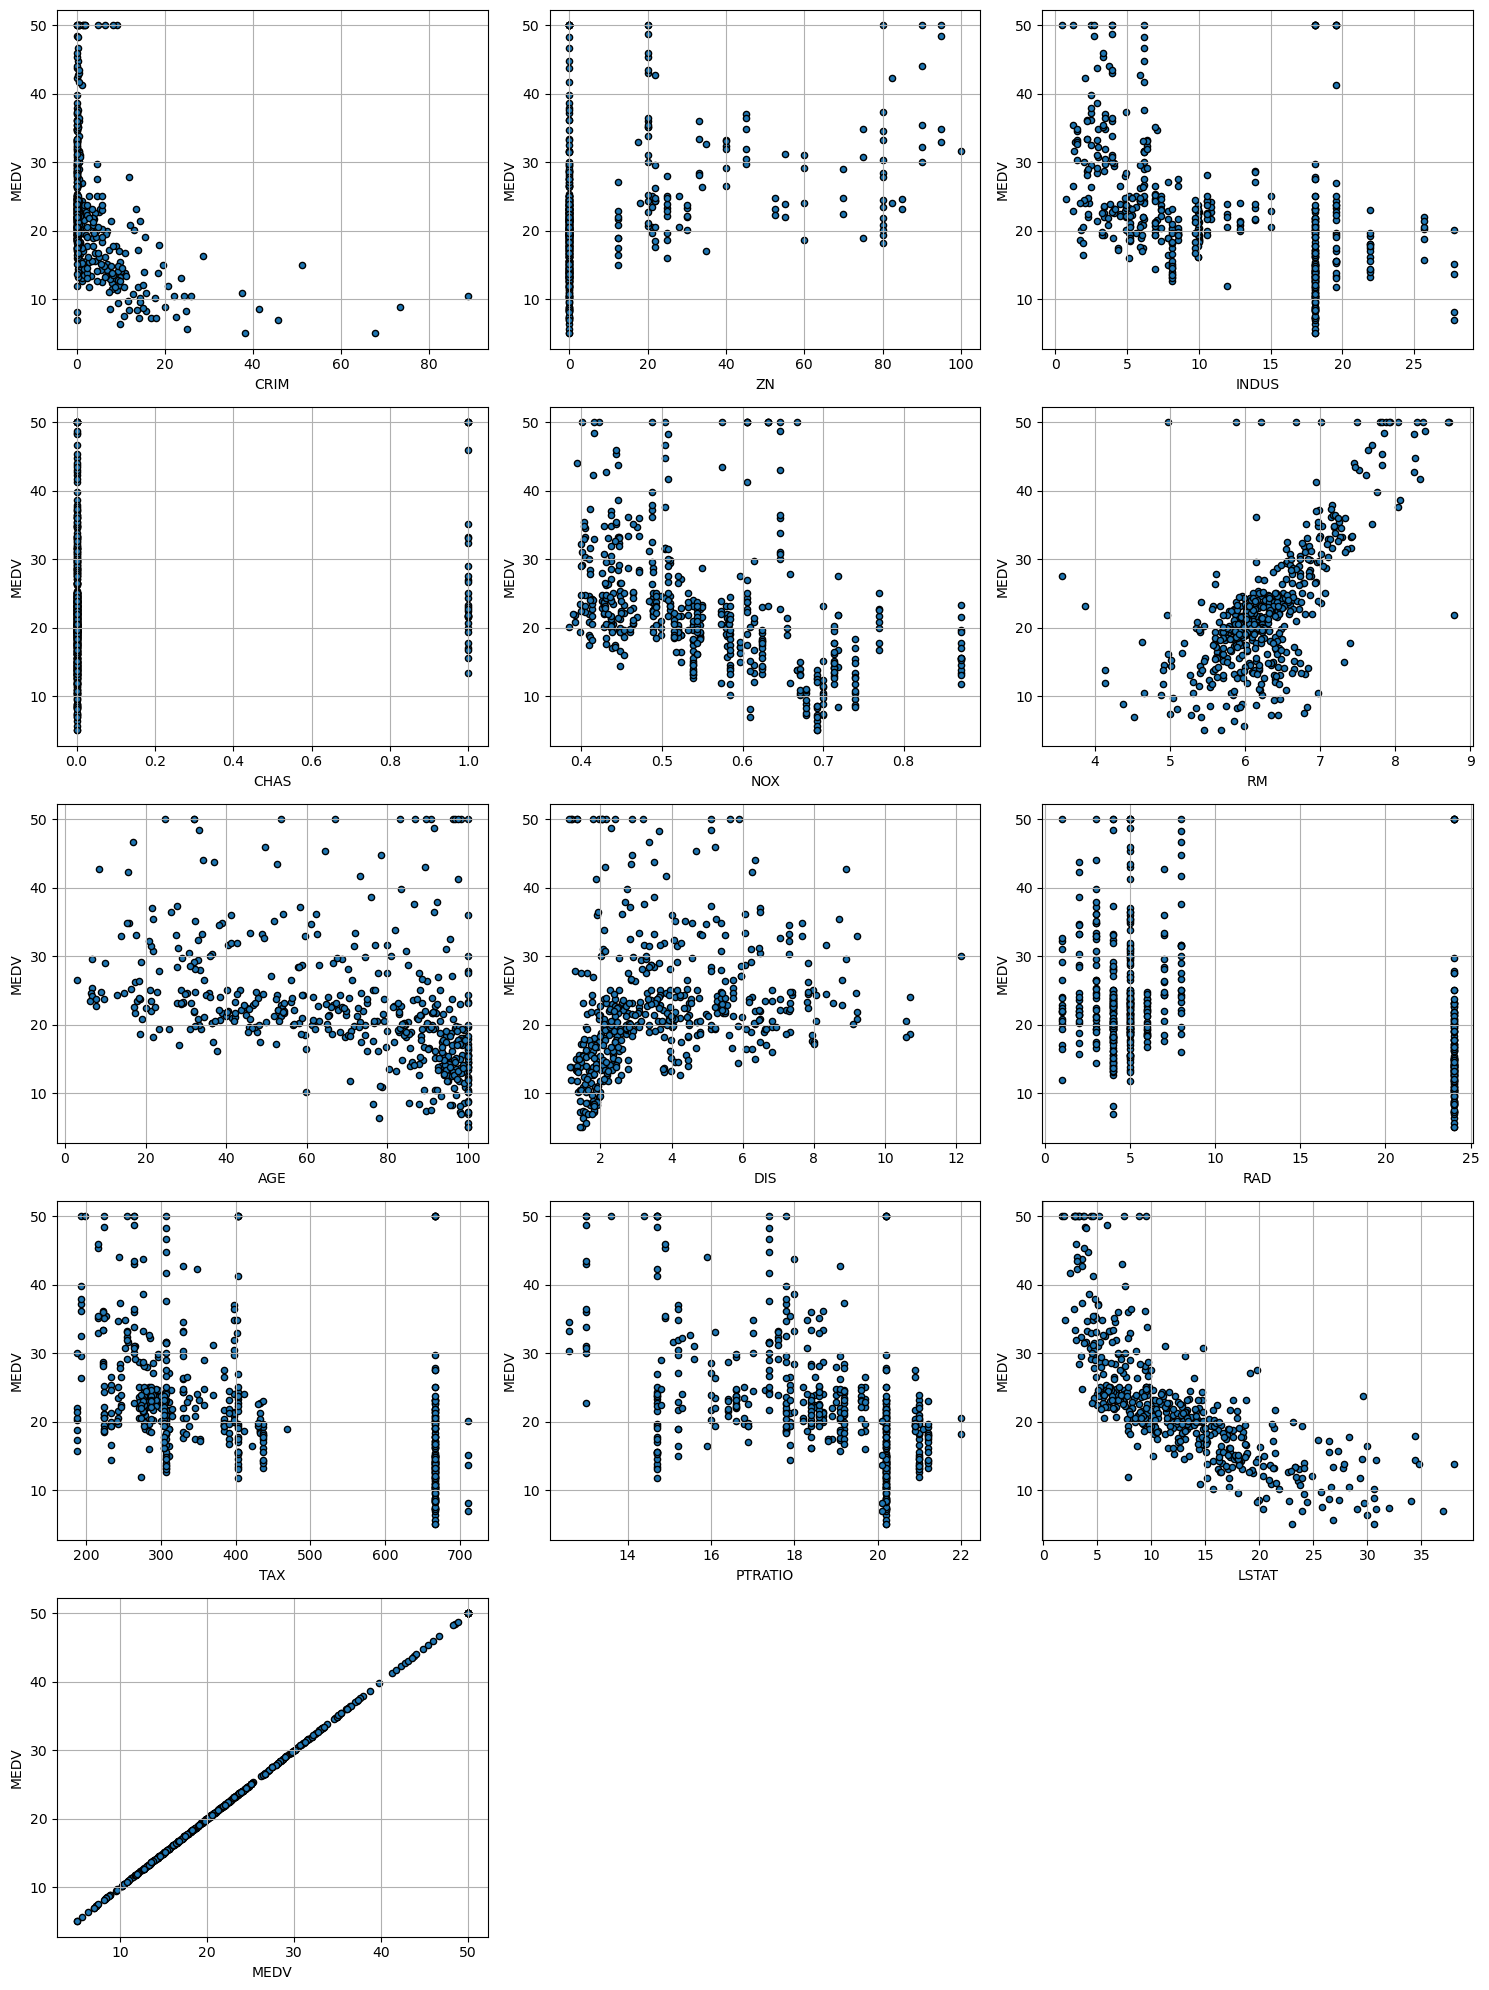

In [41]:
feature = data.columns

# Graficar cada característica contra la etiqueta
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.axis('off')  # Desactivar ejes adicionales
        continue
    ax.scatter(data[feature[i]], data['MEDV'], edgecolor='k', s=20)
    ax.set_ylabel("MEDV")
    ax.set_xlabel(feature[i])
    ax.grid(True)

plt.tight_layout()
plt.show()

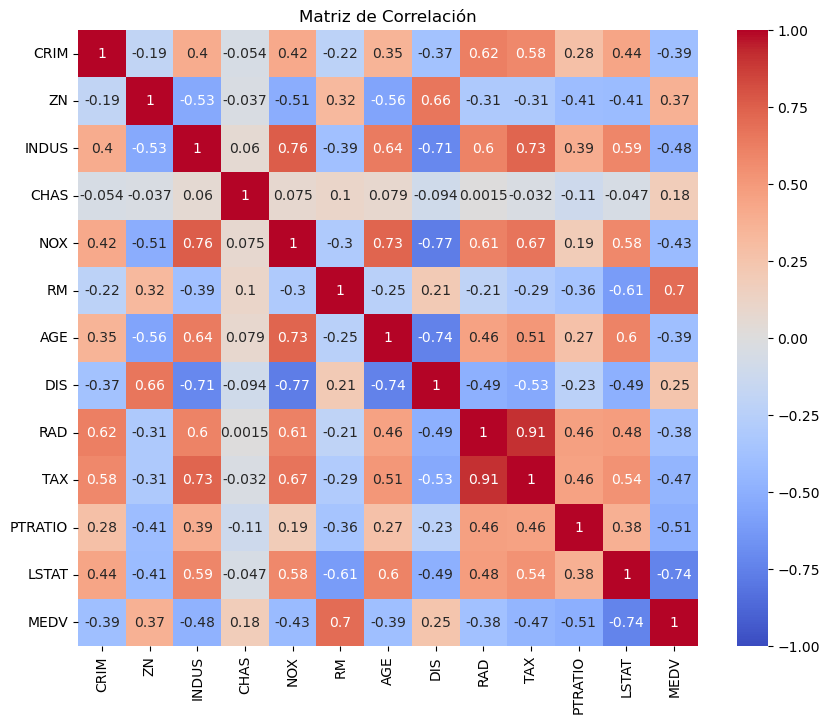

In [42]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))

# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Añadir título al mapa de calor
plt.title('Matriz de Correlación')

# Mostrar el mapa de calor
plt.show()

In [45]:
X = data.drop(['MEDV'], axis=1)
y = data['MEDV']

In [47]:
X

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO  LSTAT  
0       15.3   4.98  
1       17.8   9.14  
2       17.8   4.03  
3       18.7   2.94  
4       18.7    NaN  
..       ...    ...  
501     21.0    NaN  
502     21.0   9.08  
503     21.0   5.64  
504     21.0   6.48  
505     21.0   7.88  

[506 rows x 12 columns]

In [ ]:
(X==None).sum()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [50]:
# Impute missing values using the mean for numerical columns
numerical_imputer = SimpleImputer(strategy='mean')
X_train_numerical_imputed = numerical_imputer.fit_transform(X_train)
X_test_numerical_imputed = numerical_imputer.transform(X_test)

# Convert the imputed data back to a DataFrame
X_train_numerical_imputed = pd.DataFrame(X_train_numerical_imputed, columns=X_train.columns)
X_test_numerical_imputed = pd.DataFrame(X_test_numerical_imputed, columns=X_test.columns)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_numerical_imputed, y_train)

# Make predictions
y_pred = model.predict(X_test_numerical_imputed)


# Calcular Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)


# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular R-squared (R²)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 32.05490065647859
R-squared (R²): 0.6076464265252695
Root Mean Squared Error (RMSE): 5.661704748260774
Mean Absolute Error (MAE): 3.852886363758656
